In [1]:
import os
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
path_images          = glob(os.path.join('..', '..', 'resources', 'images_ibericam', '*'))
path_config_ibericam = os.path.join('..', '..', 'resources', 'utils', 'images_ibericam_config.csv') 

In [3]:
location_names_imag = [ '_'.join((os.path.splitext(os.path.basename(path))[0].split('-')[:-2])) for path in path_images]
dates_image         = [''.join((os.path.basename(path).split('-')[-2])) for path in path_images]
time_stamp_image    = [''.join((os.path.splitext(os.path.basename(path))[0].split('-')[-1])) for path in path_images]
time_stamp_image    = [date + time_stamp for date, time_stamp in zip(dates_image, time_stamp_image)]
formatted_times     = [dt.strptime(ts, '%Y%m%d%H%M%S') for ts in time_stamp_image]

In [4]:
df = pd.DataFrame({
    'location'  : location_names_imag,
    'date_time' : formatted_times,
    'path'      : path_images
})
df['year']  = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day']   = df['date_time'].dt.day
df['hour']  = df['date_time'].dt.hour
df['min']   = df['date_time'].dt.minute

df.to_csv(path_config_ibericam, index = False)

df.head(10)

,location,date_time,path,year,month,day,hour,min
0,albentosa,2023-03-21 13:01:01,..\..\resources\images_ibericam\albentosa-2023...,2023,3,21,13,1
1,albentosa,2023-03-21 13:02:01,..\..\resources\images_ibericam\albentosa-2023...,2023,3,21,13,2
2,albentosa,2023-03-21 13:03:01,..\..\resources\images_ibericam\albentosa-2023...,2023,3,21,13,3
3,albentosa,2023-03-21 13:04:01,..\..\resources\images_ibericam\albentosa-2023...,2023,3,21,13,4
4,albentosa,2023-03-21 13:05:01,..\..\resources\images_ibericam\albentosa-2023...,2023,3,21,13,5
5,albentosa,2023-03-22 13:01:01,..\..\resources\images_ibericam\albentosa-2023...,2023,3,22,13,1
6,albentosa,2023-03-22 13:02:01,..\..\resources\images_ibericam\albentosa-2023...,2023,3,22,13,2
7,albentosa,2023-03-22 13:03:01,..\..\resources\images_ibericam\albentosa-2023...,2023,3,22,13,3
8,albentosa,2023-03-22 13:04:01,..\..\resources\images_ibericam\albentosa-2023...,2023,3,22,13,4
9,albentosa,2023-03-22 13:05:01,..\..\resources\images_ibericam\albentosa-2023...,2023,3,22,13,5


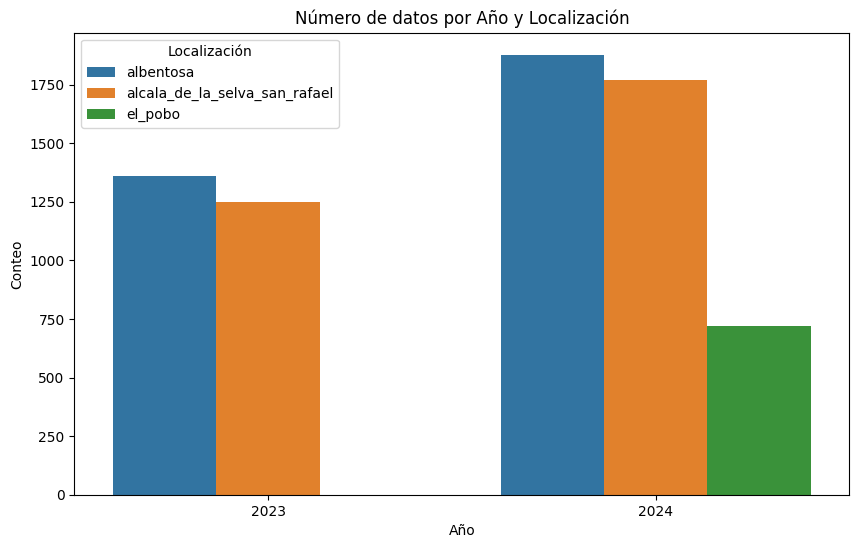

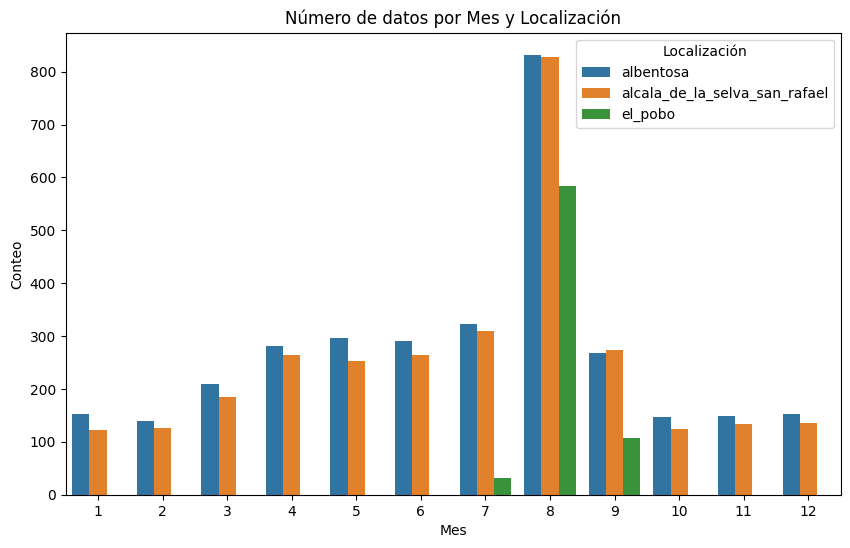

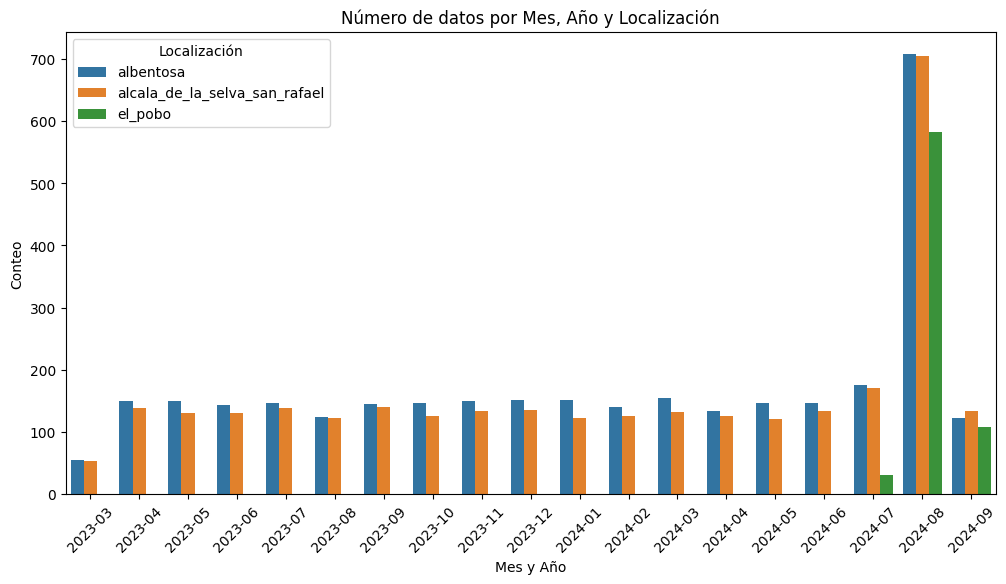

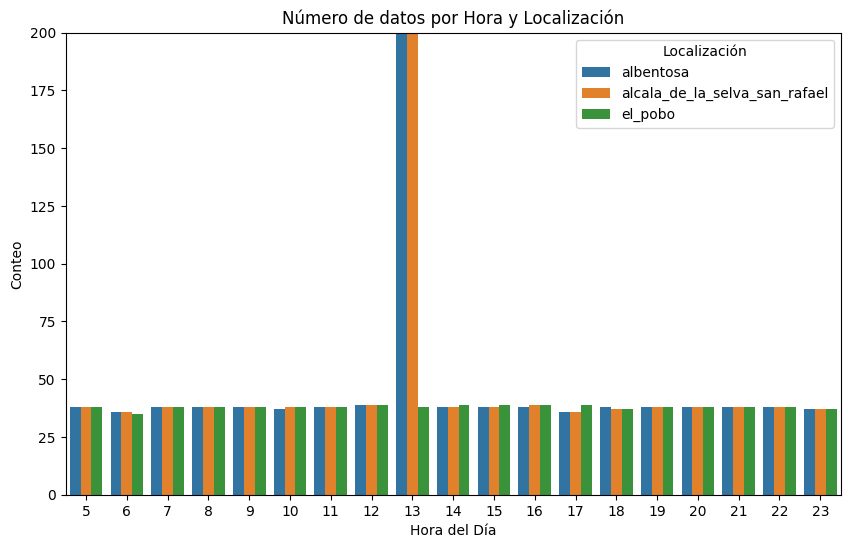

KeyError: "None of ['dateTime'] are in the columns"

In [5]:
# Estadísticas por año y localización
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', hue='location')
plt.title('Número de datos por Año y Localización')
plt.xlabel('Año')
plt.ylabel('Conteo')
plt.legend(title="Localización")
plt.show()

# Estadísticas mensuales por localización y año
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', hue='location')
plt.title('Número de datos por Mes y Localización')
plt.xlabel('Mes')
plt.ylabel('Conteo')
plt.legend(title="Localización")
plt.show()

# Crear una nueva columna que combine el año y el mes para tener un eje x con ambos
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)
# Generar el gráfico con mes, localización y año
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year_month', hue='location')
plt.title('Número de datos por Mes, Año y Localización')
plt.xlabel('Mes y Año')
plt.ylabel('Conteo')
plt.legend(title="Localización")
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje X para mayor claridad
plt.show()


# Estadísticas por hora
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', hue='location')
plt.title('Número de datos por Hora y Localización')
plt.xlabel('Hora del Día')
plt.ylabel('Conteo')
plt.ylim(0, 200)
plt.legend(title="Localización")
plt.show()


# Resample para obtener datos por día (puedes usar por hora, semana, mes)
df.set_index('dateTime', inplace=True)
df_daily = df.resample('D').size()
# Descomposición de la serie temporal
result = seasonal_decompose(df_daily, model='additive')
# Ajustar el tamaño de la figura antes de graficar
plt.figure(figsize=(10, 80))
# Graficar los componentes
result.plot()
plt.show()